# MULTIPLE LINEAR PROGRAMMING
# Shaikh Rumman Fardeen 21BCE1736

### In this lab assignment we will be explproring Multiple Linear Regression by finding Price of a Car based on its Age and total distance in KM it has driven

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings("ignore")

# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
# Reading the Dataset
cars = pd.read_csv("cars.csv")

In [4]:
cars.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


In [5]:
cars.shape

(1436, 11)

In [6]:
print(cars.corr())

            Unnamed: 0     Price       Age  MetColor  Automatic        CC  \
Unnamed: 0    1.000000 -0.738289  0.907090 -0.078616   0.066299 -0.184490   
Price        -0.738289  1.000000 -0.878407  0.112041   0.033081  0.165067   
Age           0.907090 -0.878407  1.000000 -0.099659   0.032573 -0.120706   
MetColor     -0.078616  0.112041 -0.099659  1.000000  -0.013973  0.029189   
Automatic     0.066299  0.033081  0.032573 -0.013973   1.000000 -0.069321   
CC           -0.184490  0.165067 -0.120706  0.029189  -0.069321  1.000000   
Weight       -0.414577  0.581198 -0.464299  0.057142   0.057249  0.651450   

              Weight  
Unnamed: 0 -0.414577  
Price       0.581198  
Age        -0.464299  
MetColor    0.057142  
Automatic   0.057249  
CC          0.651450  
Weight      1.000000  


In [7]:
print(cars.describe())

        Unnamed: 0         Price          Age     MetColor    Automatic  \
count  1436.000000   1436.000000  1336.000000  1286.000000  1436.000000   
mean    717.500000  10730.824513    55.672156     0.674961     0.055710   
std     414.681806   3626.964585    18.589804     0.468572     0.229441   
min       0.000000   4350.000000     1.000000     0.000000     0.000000   
25%     358.750000   8450.000000    43.000000     0.000000     0.000000   
50%     717.500000   9900.000000    60.000000     1.000000     0.000000   
75%    1076.250000  11950.000000    70.000000     1.000000     0.000000   
max    1435.000000  32500.000000    80.000000     1.000000     1.000000   

                CC      Weight  
count  1436.000000  1436.00000  
mean   1566.827994  1072.45961  
std     187.182436    52.64112  
min    1300.000000  1000.00000  
25%    1400.000000  1040.00000  
50%    1600.000000  1070.00000  
75%    1600.000000  1085.00000  
max    2000.000000  1615.00000  


In [8]:
median_age = cars['Age'].median()
cars['Age'].fillna(median_age, inplace=True)

In [9]:
cars['KM'] = pd.to_numeric(cars['KM'], errors='coerce')
median_km = cars['KM'].median()
cars['KM'].fillna(median_age, inplace=True)

In [13]:
#Setting the value for X and Y
X = cars[['Age', 'KM']]
y = cars['Price']
X

,Age,KM
0,23.0,46986.0
1,23.0,72937.0
2,24.0,41711.0
3,26.0,48000.0
4,30.0,38500.0
...,...,...
1431,60.0,20544.0
1432,72.0,60.0
1433,60.0,17016.0
1434,70.0,60.0



### A boxplot is a graphical representation that displays the distribution of a dataset, highlighting important statistics such as the median, quartiles, and potential outliers. While boxplots are commonly used for exploring the distribution of data, they may not be directly related to linear regression model evaluation. However, they can be useful in the context of linear regression in a few ways:

> * Identifying Outliers: Boxplots are effective in identifying potential outliers in the target variable or features. Outliers can have a significant impact on linear regression models, as they may disproportionately influence the estimated coefficients. By visualizing the distribution of the target variable with a boxplot, you can quickly identify if there are extreme values that might need special attention.

> * Checking Residuals: In linear regression, residuals represent the differences between the actual and predicted values. By creating a boxplot of the residuals, you can assess whether the model assumptions are met. Ideally, the residuals should be homoscedastic (have constant variance) and exhibit a normal distribution. Boxplots can help in identifying patterns or non-constant variance in residuals.

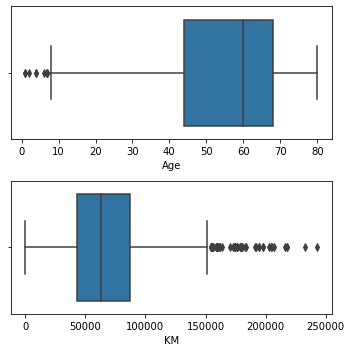

In [11]:
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(cars['Age'], ax = axs[0])
plt2 = sns.boxplot(cars['KM'], ax = axs[1])
plt.tight_layout()

### Exploratory Data Analysis
### Distribution of the target variable

###  A distplot is a seaborn function used to visualize the distribution of a univariate dataset. While it's not directly used to evaluate the efficiency of a linear regression model, it can still be informative, especially when examining the distribution of residuals. Residuals are the differences between the actual and predicted values, and analyzing their distribution can provide insights into the model's performance

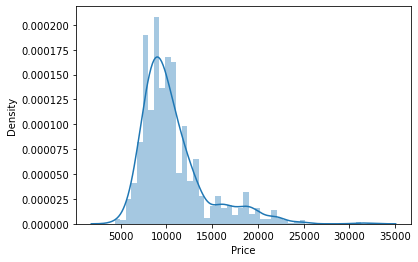

In [12]:
sns.distplot(cars['Price']);

###  The pairplot function in the seaborn library is used to create a matrix of scatterplots for a dataset. Each scatterplot shows the relationship between two variables, and the diagonal of the matrix shows the distribution of each variable.

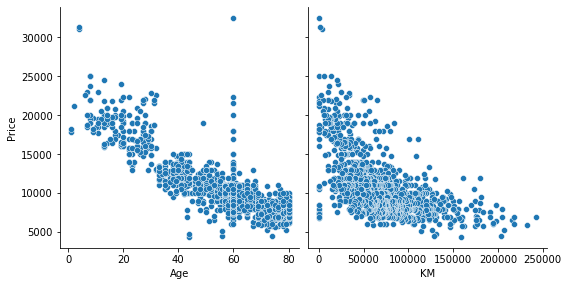

In [13]:
sns.pairplot(cars, x_vars=['Age', 'KM'], y_vars='Price', height=4, aspect=1, kind='scatter')
plt.show()

###  A heatmap and correlation matrix are powerful tools in the context of machine learning when working with datasets with multiple features. They help in understanding the relationships between different variables and can be significant in various stages of the machine learning model development process.

The significance of the heatmap and correlation matrix in making ML models:

> * Identifying Feature Relationships:
The heatmap visualizes the correlation matrix, which provides insights into how features are correlated with each other. Understanding these relationships is crucial for feature selection and engineering. Highly correlated features might introduce multicollinearity, which can affect the performance of certain models like linear regression.

> *  Feature Selection:
By analyzing the correlation matrix, you can identify features that are strongly correlated with the target variable. Features with high correlations are generally more informative and might contribute more to the predictive power of the model.

> * Detecting Multicollinearity:
 Multicollinearity occurs when two or more features in a model are highly correlated. This can lead to issues in interpretation and stability of coefficients in linear regression models. The correlation matrix helps in identifying and addressing multicollinearity.

> * Model Performance:
Understanding feature correlations can provide insights into potential issues that might affect model performance. For example, if two features are highly correlated, it may be redundant to include both in the model.
Assumptions and Interpretability:

In linear regression, it's assumed that features are not highly correlated. The correlation matrix helps verify this assumption. Additionally, interpreting the impact of individual features becomes more straightforward when features are not strongly correlated.

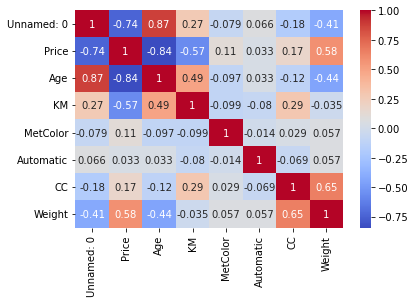

In [14]:
# Create the correlation matrix and represent it as a heatmap.
sns.heatmap(cars.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [15]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [16]:
y_train.shape

(1005,)

In [17]:
y_test.shape

(431,)

In [18]:
reg_model = linear_model.LinearRegression()

In [19]:
#Fitting the Multiple Linear Regression model
reg_model = LinearRegression().fit(X_train, y_train)

In [20]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  20616.168748892465


[('Age', -150.0268904506487), ('KM', -0.020801181882424982)]

In [21]:
#Predicting the Test and Train set result 
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train) 

In [22]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [15821.01877623  9900.15251554 14256.65593138  9637.15113854
  7222.82243408  8454.11229221 13933.07274602  4562.67532351
 12787.715838    7129.58826913 14512.37912594  7973.32803985
 12611.1707084   5999.5159255  19265.90593365  8093.7701507
 14275.51383664 16062.57740247 17366.27513819  9374.02272323
 13039.92690057  9026.41090504 12599.23409775 11201.68366059
  9218.44637964  9017.62403957 10512.09268209  7882.10178629
  9927.44589738  9086.27566995  9430.4312242  14513.93594683
  8048.21006342 19207.94180646  9966.64735852  8868.64597493
 10428.88795456  7793.63659095 12933.32411118 11742.49908732
  7222.83446854  7737.24116099  9778.34079444 15067.97542627
  9120.04905916  8411.0112068  12065.92789769  7519.1670691
 12049.55633101 13596.83367536 11367.06835878 13480.13027828
 12396.55837942 14380.29815649 16305.15648129 11742.72463256
 16195.92724401  7961.09144594 14250.85240164  9520.04048454
 19212.35165702  7568.49320685 13684.33548082 11815.86158806
 

In [23]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
57,15250,15821.018776
1002,8250,9900.152516
360,12950,14256.655931
903,9750,9637.151139
1277,8800,7222.822434
...,...,...
1326,7400,7242.179568
106,18800,18276.578691
1284,8950,10095.777828
740,8250,9293.711591


In [24]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 1195.0092003032553
Mean Square Error: 2756859.8091554996
Root Mean Square Error: 1660.3794172283333
